## 2. Conditional density estimation for the Banana distribution

In this notebook, we will show how to perform conditional density estimation. For a state variable $\mathsf{X} \sim \pi_{\mathsf{X}} \in \mathbb{R}^n$ and an observation variable $\mathsf{Y} \sim \pi_{\mathsf{X}} \in \mathbb{R}^d$, we are interested in the characterization of the posterior density $\pi_{\mathsf{X}| \mathsf{Y}}(\boldsymbol{x} | \boldsymbol{y}^\star)$, where $\boldsymbol{y}^\star$ is the realization of the observation $\mathsf{Y}$. In particular, we would like to sample from the posterior density $\pi_{\mathsf{X} | \mathsf{Y}} (\boldsymbol{x} | \boldsymbol{y}^\star)$ given $N_e$ samples $\{ \boldsymbol{x}^1, \ldots, \boldsymbol{x}^{N_e} \}$ from the prior density $\pi_{\mathsf{X}}$.

Let $\boldsymbol{S} \colon \mathbb{R}^{n+d} \xrightarrow{} \mathbb{R}^{n+d}$ be the KR rearrangement that pushes forward the joint density $\pi_{\mathsf{X}, \mathsf{Y}}$ (target density) to the standard normal density $\mathcal{N}(\boldsymbol{0}_{n+d}, \boldsymbol{I}_{n+d})$ (reference density). From its lower triangular structure, $\boldsymbol{S}$ can be decomposed as follows:

\begin{equation}
\label{eqn:split}
\boldsymbol{S}(\boldsymbol{y}, \boldsymbol{x})=\left[\begin{array}{c}
\begin{aligned}
& \boldsymbol{S}^{\boldsymbol{\mathcal{Y}}}(\boldsymbol{y}) \\
& \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x})
\end{aligned}
\end{array}\right],
\end{equation}
where $\boldsymbol{S}^{\boldsymbol{\mathcal{Y}}} \colon \mathbb{R}^d \xrightarrow{} \mathbb{R}^{d}$ and $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}} \colon \mathbb{R}^{n+d} \xrightarrow{} \mathbb{R}^{n}$. For a sample $(\boldsymbol{y}, \boldsymbol{x})$ from the joint density, $\boldsymbol{a} = \boldsymbol{S}^{\boldsymbol{\mathcal{Y}}}(\boldsymbol{y}, \boldsymbol{x})$ is a sample from $\mathcal{N}(\boldsymbol{0}_{n}, \boldsymbol{I}_{n})$, as $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\mathsf{Y}, \mathsf{X}) \sim \mathcal{N}(\boldsymbol{0}_{n}, \boldsymbol{I}_{n})$.

For a realization $\boldsymbol{y}^\star \in \mathbb{R}^d$ of the observation variable, instead of $\boldsymbol{y}$, we update our prior estimate $\boldsymbol{x}$ into $\boldsymbol{x}_a$ such that  $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x}_a) = \boldsymbol{a}$. Therefore, the analysis step looks for $\boldsymbol{x}_a \in \mathbb{R}^n$ such that:
\begin{equation}
\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x}_a) = \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x}).
\end{equation}

The map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ pushes forward the posterior density $\pi_{\mathsf{X} | \mathsf{Y}}(\cdot | \boldsymbol{y}^\star)$ to the standard normal density $\mathcal{N}(\boldsymbol{0}_{n}, \boldsymbol{I}_{n})$, so $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ is a bijection of $\mathbb{R}^n$ and there exists a unique solution to the vector-valued nonlinear equation above, denoted $\boldsymbol{x}_a$. This solution is exactly the posterior update of the prior estimate $\boldsymbol{x}$ given the realization $\boldsymbol{y}^\star$ of the observation variable. We arrive at the definition of the prior-to-posterior transformation $\boldsymbol{T} \colon \mathbb{R}^d \times \mathbb{R}^n \xrightarrow{} \mathbb{R}^n$:
\begin{equation}
\label{eqn:tmapdef}
    \boldsymbol{T}(\boldsymbol{y}, \boldsymbol{x}) = \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \cdot)^{-1}\circ \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x}),
\end{equation}
where $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \cdot)^{-1}$ 
denotes the inverse of the map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ that comes from setting the first $d$ entries of $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$ to $\boldsymbol{y}^\star$.

References: 
* Spantini, A., Baptista, R. and Marzouk, Y., 2019. Coupling techniques for nonlinear ensemble filtering. arXiv preprint arXiv:1907.00389. 
* Le Provost, M., Baptista, R., Marzouk, Y. and Eldredge, J., 2021. A low-rank nonlinear ensemble filter for vortex models of aerodynamic flows. In AIAA Scitech 2021 Forum (p. 1937).

In [1]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions

┌ Info: Precompiling AdaptiveTransportMap [bdf749b0-1400-4207-80d3-e689c0e3f03d]
└ @ Base loading.jl:1278
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116
┌ Warning: Type annotations on keyword arguments not currently supported in recipes. Type information has been discarded
└ @ RecipesBase ~/.julia/packages/RecipesBase/92zOw/src/RecipesBase.jl:116


Load some packages to make nice figures

In [2]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
pyplot()

using LaTeXStrings
PyPlot.rc("text", usetex = "true")
PyPlot.rc("font", family = "CMU Serif")
# gr()
using ColorSchemes

### Problem setup

 We start by generating $N_e$ samples from a banana distribution.

In [3]:
function swaprows!(X::AbstractMatrix, i::Integer, j::Integer)
    @inbounds for k = 1:size(X,2)
        X[i,k], X[j,k] = X[j,k], X[i,k]
    end
end

swaprows! (generic function with 1 method)

In [4]:
Ne = 10^3 # Number of samples
Nx = 2 # Dimension of the state

# Define the parameters of the banana distribution
μ = 0.0
σ = 2.0
bananicity = 0.3

# Generate the samples
X = sample_banana(Ne, μ = μ, σ = σ, bananicity = bananicity)

swaprows!(X, 1, 2)

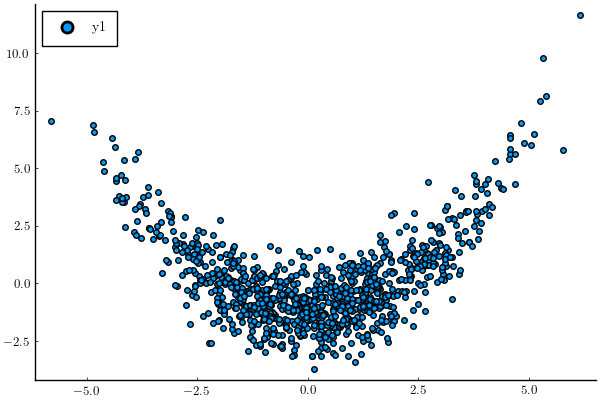

In [5]:
scatter(X[2,:], X[1,:])

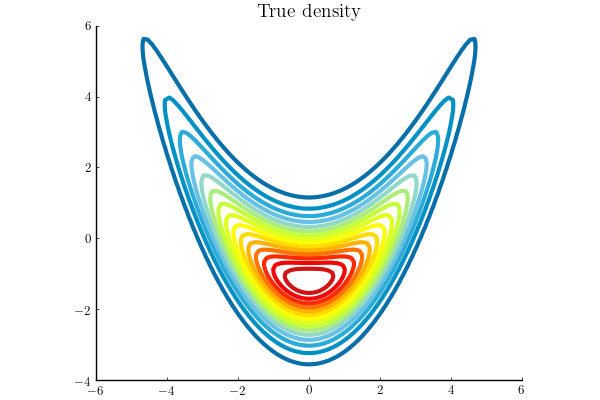

In [6]:
Nlog = 100
logbanana = zeros(Nlog, Nlog)

xrange = range(-6.0; stop = 6.0, length = Nlog)
yrange = range(-4.0; stop = 6.0, length = Nlog)

for (i,x) in enumerate(xrange)
    for (j,y) in enumerate(yrange)
        logbanana[i,j] = log_pdf_banana([x;y]; μ = μ, σ = σ, bananicity = bananicity)
    end
end


contour(xrange, yrange, exp.(logbanana)', ratio = 1,
         title = "True density",
         colorbar = false, grid = false,
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         xlim = (xrange[1], xrange[end]), ylim = (-Inf, Inf), linewidth = 3)

We define an object of  `HermiteMap` `S` to hold the Knothe-Rosenblatt rearrangement that pushes forward $\pi$ to the reference density, i.e. the standard Gaussian distribution $\rho$.
The default constructor for an `HermiteMap` requires, where $m$ is the maximal order of the Hermite polynomials considered in the expansion, $N_x$ the dimension of the state, $L$ a linear transformation that rescale the samples to get zero mean and unitary standard deviation component-wise, and $C$ an array of $N_x$ `MapComponent`.

In [7]:
m = 100
S = HermiteMap(m, X; diag = false);

The next step is to use the greedy algorithm developed by Baptista et al. (2020) to construct a sparse expansion of the different components of the map $S$. Depending on the accuracy of the amp required. Several options are possible for the optimization: 
* `kfold` uses a k-fold cross validation procedure (the more robust choice)
* `split` splits the set of samples into a training and a testing
* An `Int64` to determine the maximum number of features for each component $s^k$ of the map $S$
* `nothing` to simply optimize the existing coefficients in the basis expansion

In [ ]:
optimize(S, X, "kfold"; withqr = true, verbose = true, conditioner = false)

1 terms - Training error: 1.4428054041355511, Validation error: 1.3209710494811588
1 terms - Training error: 1.4395438123346518, Validation error: 1.3167877417389826
2 terms - Training error: 1.4252590537587682, Validation error: 1.2847557576189041
3 terms - Training error: 1.36268203059657, Validation error: 1.2579215757278532
4 terms - Training error: 1.3625797675797215, Validation error: 1.2576238740699228
5 terms - Training error: 1.339291176455429, Validation error: 1.239498047944291
6 terms - Training error: 1.3353799422836863, Validation error: 1.2452621223598856
7 terms - Training error: 1.3284587563046923, Validation error: 1.2364940480941373
8 terms - Training error: 1.3276562554379303, Validation error: 1.233453040990209
9 terms - Training error: 1.32418085658879, Validation error: 1.2306104417297465
10 terms - Training error: 1.3212821285281913, Validation error: 1.233816987682254
11 terms - Training error: 1.3171294168719274, Validation error: 1.2385148333722635
12 terms -

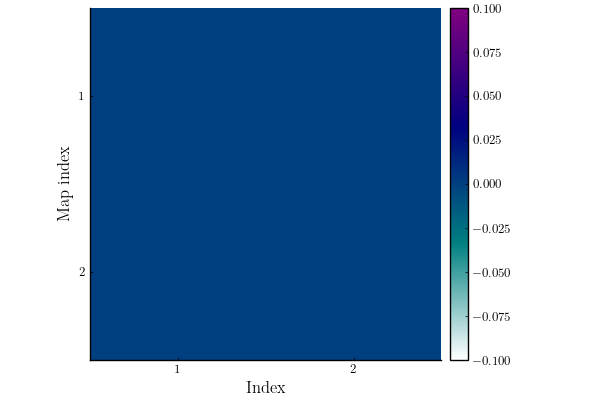

In [96]:
plot(S; degree = false)

In [97]:
F = deepcopy(evaluate(S, X; start = 2))

2×800 Array{Float64,2}:
 0.0        0.0         0.0        0.0       …   0.0        0.0       0.0
 0.0349386  0.0852974  -0.185519  -0.179559     -0.147823  -0.104929  0.3247

In [98]:
Xpost = deepcopy(X)

2×800 Array{Float64,2}:
 -1.41427   -1.12436   -1.32267   …  -0.540462  -0.825621   0.0520047
  0.288634   0.350862  -0.167002     -0.196526  -0.0718765  0.673866

In [99]:
ystar = 1.5
Ystarprime = ystar*ones(1, Ne);

In [100]:
# Generate posterior samples
@time inverse!(F, S, Xpost, Ystarprime; apply_rescaling = true, start = 2)

converged(result) = true
  0.000989 seconds (335 allocations: 842.234 KiB)


2×800 Array{Float64,2}:
  1.5        1.5          1.5       …   1.5       1.5       1.5
 -0.103766  -0.00250249  -0.547069     -0.47127  -0.385017  0.478896

In [88]:
?histogram

search: histogram histogram! histogram2d histogram2d!



```
histogram(x)
histogram!(x)
```

Plot a histogram.

# Arguments

  * `x`: AbstractVector of values to be binned
  * `bins`: Integer, NTuple{2,Integer}, AbstractVector or          Symbol. Default is :auto (the Freedman-Diaconis rule). For          histogram-types, defines the approximate number of bins to aim for,          or the auto-binning algorithm to use (:sturges,          :sqrt, :rice, :scott or :fd). For fine-grained control          pass a Vector of break values, e.g. `range(minimum(x),          stop = maximum(x), length = 25)`
  * `weights`: Vector of weights for the values in `x`, for weighted bin counts
  * `normalize`: Bool or Symbol. Histogram normalization mode.               Possible values are: false/:none (no normalization,               default), true/:pdf (normalize to a discrete               Probability Density Function, where the total area of the               bins is 1), :probability (bin heights sum to 1)               and :density (the area of each bin, rather than               the height, is equal to the counts - useful for               uneven bin sizes).
  * `bar_position`: Symbol.  Choose from `:overlay` (default),                  `:stack`.  (warning: May not be implemented fully)
  * `bar_width`: nothing or Number. Width of bars in data               coordinates. When nothing, chooses based on x (or y when               `orientation = :h`).
  * `bar_edges`: Bool.  Align bars to edges (true), or centers               (the default)?
  * `orientation`: Symbol.  Horizontal or vertical orientation                 for bar types.  Values `:h`, `:hor`,                 `:horizontal` correspond to horizontal (sideways,                 anchored to y-axis), and `:v`, `:vert`, and                 `:vertical` correspond to vertical (the default).

# Example

```julia-repl
julia> histogram([1,2,1,1,4,3,8],bins=0:8)
```


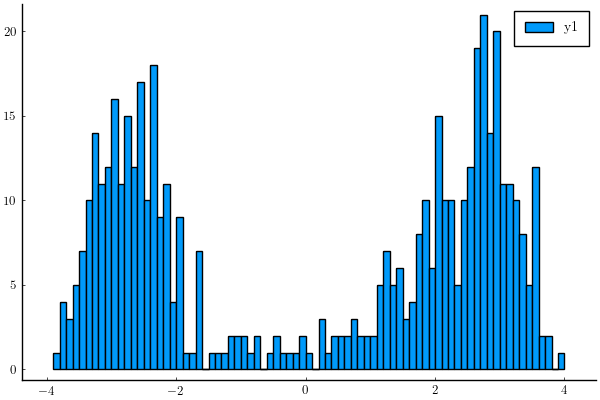

In [90]:
histogram(sort(Xpost[2,:]), bins = 100)

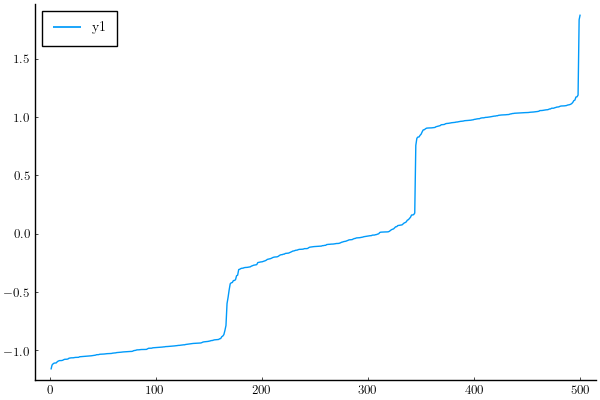

In [56]:
plot(sort(Xpost[2,:]))

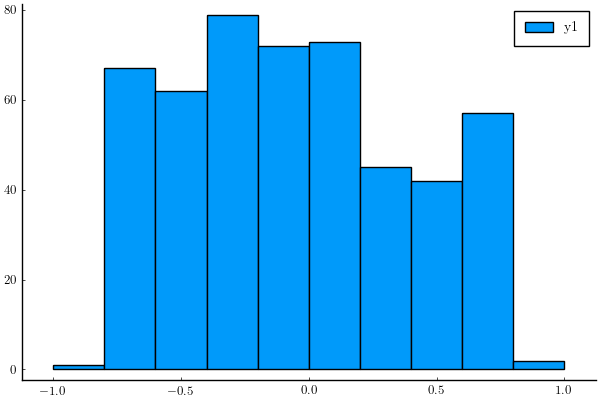

In [51]:
histogram(Xpost[2,:])

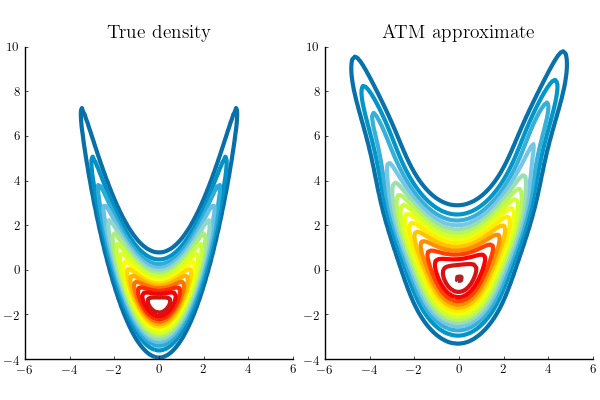

In [130]:
plt = plot(layout = grid(1, 2), colorbar = false, grid = false)
contour!(plt[1,1], xrange, yrange, exp.(logbanana)', ratio = 1,
         title = "True density",
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         xlim = (xrange[1], xrange[end]), ylim = (-Inf, Inf), linewidth = 3)

contour!(plt[1,2], xrange, yrange, exp.(logbanana_approx)', ratio = 1,
         title = "ATM approximate",
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         xlim = (xrange[1], xrange[end]), ylim = (-Inf, Inf), linewidth = 3)

We can overlap the estimated density with the sampples

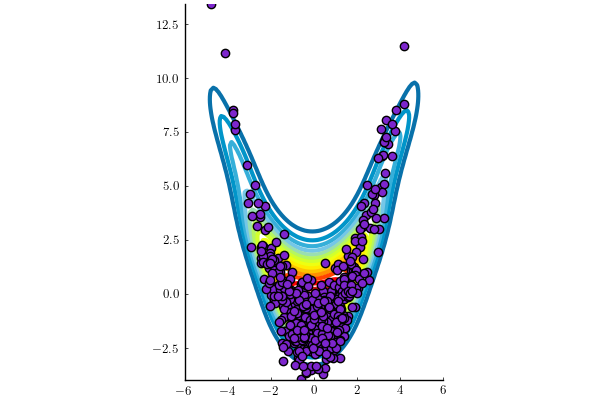

In [110]:
contour(xrange, yrange, exp.(logbanana_approx)', ratio = 1, colorbar = false,
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         xlim = (-Inf, Inf), ylim = (-Inf, Inf), linewidth = 3)
scatter!(X[1,:], X[2,:]; legend = false, color = :purple3, ratio = 1, markersize = 6)